# Loan Data Exploration
## by Adesoba Adewale Olamide

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
data = pd.read_csv('prosperLoanData.csv')
loan_data = data.copy()

In [4]:
# overview of data shape
loan_data.shape

(113937, 81)

In [5]:
# overview of data composition
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Getting rid of low information features i.e columns with null value greater than 50%
for i in loan_data.columns:
    if (loan_data[i].isna().sum()/len(loan_data))*100 > 50:
        loan_data.drop(i,axis=1,inplace=True)
    else:
        pass

In [7]:
important_columns = ['Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','ProsperRating (Alpha)',
                     'ListingCategory (numeric)', 'BorrowerState', 'Occupation','ProsperRating (numeric)',
                     'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                     'RevolvingCreditBalance', 'BankcardUtilization','AvailableBankcardCredit', 
                     'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
                     'StatedMonthlyIncome', 'LoanKey', 'LoanNumber', 'LoanOriginalAmount',
                     'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
                     'MonthlyLoanPayment', 'LP_CustomerPayments',
                     'LP_CustomerPrincipalPayments', 'LP_InterestandFees','Investors']

In [8]:
loan_data = loan_data[important_columns]

In [9]:
loan_data

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,ProsperRating (numeric),...,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,0,CO,Other,NaN,...,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,258
1,36,Current,0.12016,0.0920,0.0820,A,2,CO,Professional,6.0,...,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,0,GA,Other,NaN,...,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,41
3,36,Current,0.12528,0.0974,0.0874,A,16,GA,Skilled Labor,6.0,...,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,158
4,36,Current,0.24614,0.2085,0.1985,D,2,MN,Executive,3.0,...,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.1764,C,1,IL,Food Service Management,4.0,...,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200,1
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,A,7,PA,Professional,6.0,...,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,22
113934,60,Current,0.23984,0.2150,0.2050,D,1,TX,Other,3.0,...,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,119
113935,60,Completed,0.28408,0.2605,0.2505,C,2,GA,Food Service,4.0,...,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,274


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Term                          113937 non-null  int64  
 1   LoanStatus                    113937 non-null  object 
 2   BorrowerAPR                   113912 non-null  float64
 3   BorrowerRate                  113937 non-null  float64
 4   LenderYield                   113937 non-null  float64
 5   ProsperRating (Alpha)         84853 non-null   object 
 6   ListingCategory (numeric)     113937 non-null  int64  
 7   BorrowerState                 108422 non-null  object 
 8   Occupation                    110349 non-null  object 
 9   ProsperRating (numeric)       84853 non-null   float64
 10  EmploymentStatus              111682 non-null  object 
 11  EmploymentStatusDuration      106312 non-null  float64
 12  IsBorrowerHomeowner           113937 non-nul

In [11]:
#converting LoanOriginationDate to datetime
loan_data.LoanOriginationDate = pd.to_datetime(loan_data.LoanOriginationDate)

In [12]:
#converting ListingCategory to alpha from numeric listing
listingcat = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use",
 6 : "Auto", 7: "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure",11 : "Engagement Ring", 12 : "Green Loans",
 13 : "Household Expenses",  14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV",
 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}

In [13]:
#function to work on listing category
def listcat(x):
    return listingcat[x]


loan_data["ListingCategory"] = loan_data["ListingCategory (numeric)"].apply(listcat)


In [14]:
#function for extracting the  year

def year(x):
    return x.split(' ')[1]

#function for extracting the quarter of the year
def quarter(x):
    return x.split(' ')[0]

In [15]:
loan_data['LoanOriginationYear']= loan_data["LoanOriginationQuarter"].apply(year)
loan_data['LoanOriginationQuarter'] = loan_data['LoanOriginationQuarter'].apply(quarter)

In [16]:
#Check it statistical description
loan_data.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),ProsperRating (numeric),EmploymentStatusDuration,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,113937.000000,84853.000000,106312.000000,1.063330e+05,106333.000000,106393.000000,105383.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,2.774209,4.072243,96.071582,1.759871e+04,0.561309,11210.225447,0.275947,5.608026e+03,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,80.475228
std,10.436212,0.080364,0.074818,0.074516,3.996797,1.673227,94.480605,3.293640e+04,0.317918,19818.361309,0.551759,7.478497e+03,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,103.239020
min,12.000000,0.006530,0.000000,-0.010000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,1.000000
25%,36.000000,0.156290,0.134000,0.124200,1.000000,3.000000,26.000000,3.121000e+03,0.310000,880.000000,0.140000,3.200333e+03,37332.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,1.000000,4.000000,67.000000,8.549000e+03,0.600000,4100.000000,0.220000,4.666667e+03,68599.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,44.000000
75%,36.000000,0.283810,0.250000,0.240000,3.000000,5.000000,137.000000,1.952100e+04,0.840000,13180.000000,0.320000,6.825000e+03,101901.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,115.000000
max,60.000000,0.512290,0.497500,0.492500,20.000000,7.000000,755.000000,1.435667e+06,5.950000,646285.000000,10.010000,1.750003e+06,136486.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,1189.000000


In [17]:
#check unique values for categorical columns
for i in loan_data.columns:
    if loan_data[i].dtype == "object":
        print(i,loan_data[i].nunique())
        print("<=======================>")
        print(loan_data[i].unique())
        print("====================================================================================")

LoanStatus 12
<=======================>
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ProsperRating (Alpha) 7
<=======================>
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
BorrowerState 51
<=======================>
['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 'ME' 'AK' 'IA' 'SD' 'ND']
Occupation 67
<=======================>
['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales - Retail'
 'Laborer' 'Food Service' 'Fireman' 'Waiter/Waitress' 'Construction'
 'Computer Programmer' 'Sales - Commission' 'Retail Management'
 'Engineer - Mechanical' 'Military Enlisted' 'Clerical' nan 'Teacher'
 'Clergy' 'Accountant/C

In [18]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Term                          113937 non-null  int64         
 1   LoanStatus                    113937 non-null  object        
 2   BorrowerAPR                   113912 non-null  float64       
 3   BorrowerRate                  113937 non-null  float64       
 4   LenderYield                   113937 non-null  float64       
 5   ProsperRating (Alpha)         84853 non-null   object        
 6   ListingCategory (numeric)     113937 non-null  int64         
 7   BorrowerState                 108422 non-null  object        
 8   Occupation                    110349 non-null  object        
 9   ProsperRating (numeric)       84853 non-null   float64       
 10  EmploymentStatus              111682 non-null  object        
 11  EmploymentSta

In [19]:
# drop rows without Prosper rating numeric
loan_data.drop(loan_data[loan_data['ProsperRating (numeric)'].isna()].index,inplace=True)

### What is the structure of your dataset?

> There are 113937 loan records in the dataset with 80 features out of which 30 important features and 84853 records will be considered for this our analysis due to their relevance in determining the amount of loan to be collected and prosper rating. Majority of the  variables are numeric (float and imteger) in nature, but the variable LoanOriginationDate is in datetime after careful convertion while the remaining features are categorical in nature.

> The ordinal features includes
(worst) ——> (best) <br>
ProsperRating (Alpha): HR E D C B A AA <br>
IncomeRange: Not employed, $0, $1-24,999, $25,000-49,999, $50,000-74,999, $75,000-99,999, $100,000+ <br>


### What is/are the main feature(s) of interest in your dataset?

> My interest is centered around how each feature both numerical and categorical influences the amount of money borrowed from each list

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The remaining 30 features will play important rows in this analysis both datetime, categorical and numerical

## Univariate Exploration

#### DISTRIBUTION OF THE NUMERICAL VARIABLE OF INTEREST

> The numerical variable of interest are
    >> **LoanOriginalAmount, BorrowerAPR, BorrowerRate, ProsperRating (numeric)**

## LoanOriginalAmount Distribution

In [24]:
#standard-scaled histogram plot

def hist_plot(column,binsize,data):
    
    bins = np.arange(0, data[column].max()+binsize, binsize)
    
    plt.figure(figsize=[15,8])
    plt.hist(data = data, x = column, bins = bins)
    plt.xlabel(column)
    plt.ylabel("record count")
    plt.title(f"{column} distribution")
    plt.show()

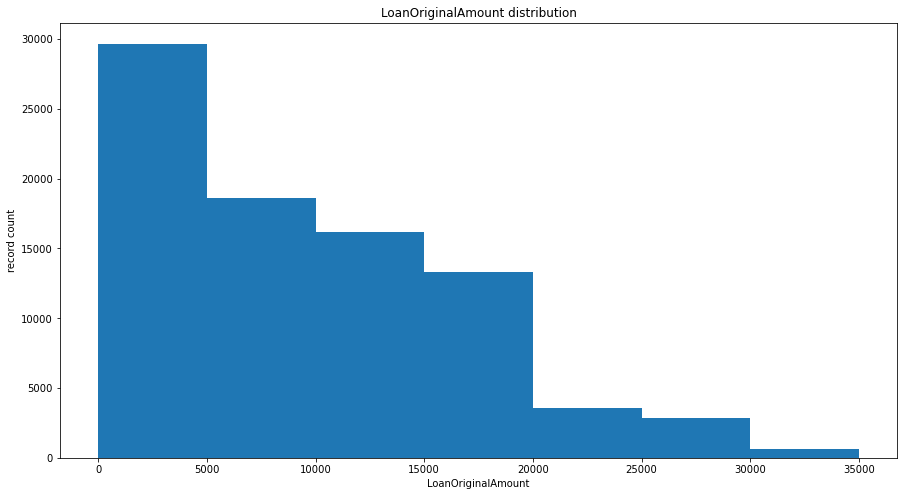

In [25]:
hist_plot("LoanOriginalAmount",5000,loan_data)

> LoanOriginalAmount has a right skewed  distribution, with a lot of loan listing on the low LoanOriginalAmount end, and few on the high LoanOriginalAmount end.

## BorrowerAPR Distribution

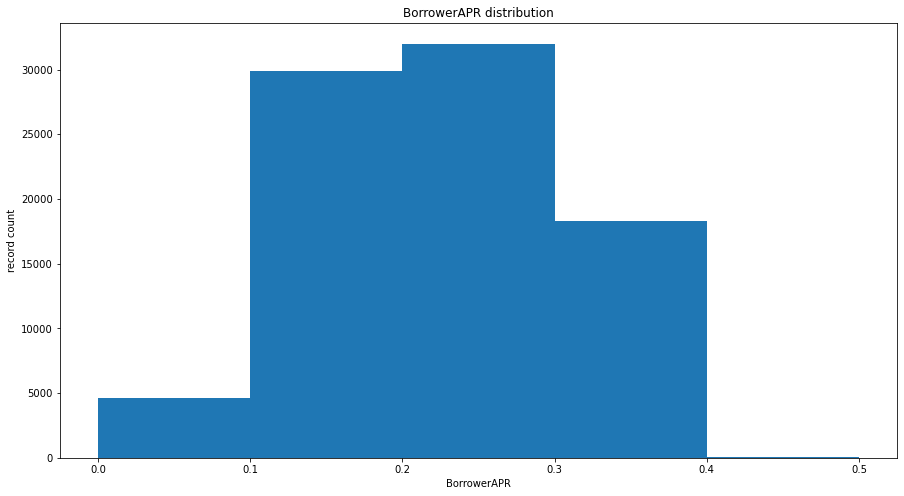

In [27]:
hist_plot("BorrowerAPR",0.1,loan_data)

> BorrowerAPR has a right skewed  distribution, with a lot of loan listing at the center of this distribution , and few on the high and low BorrowerAPR end.

## BorrowerRate Distribution

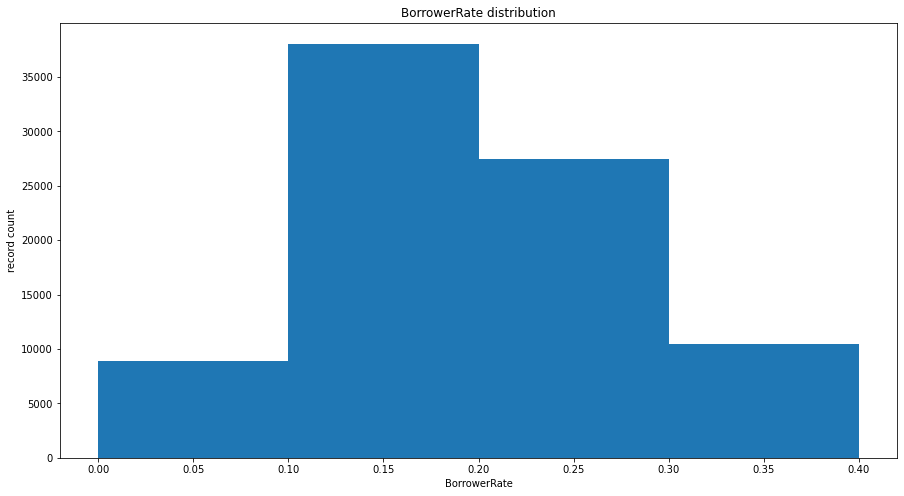

In [28]:
hist_plot("BorrowerRate",0.1,loan_data)

> BorrowerRate has a right skewed  distribution, with a lot of loan listing at the center of this distribution , and few on the high and low BorrowerRate end.

## EmploymentStatusDuration Distribution

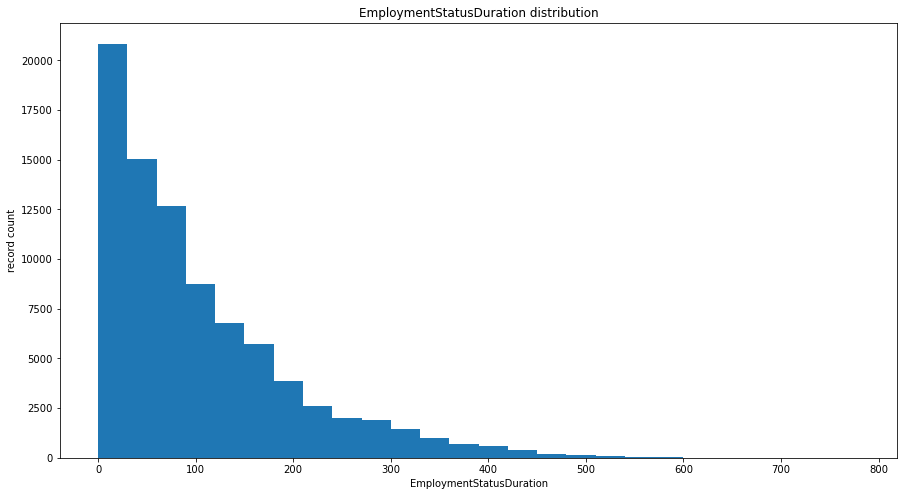

In [30]:
hist_plot("EmploymentStatusDuration",30,loan_data)

> EmploymentStatusDuration has a right skewed  distribution, with a lot of loan listing on the low EmploymentStatusDuration end, and few on the high EmploymentStatusDuration end.

In [31]:
## ProsperRating  Distribution

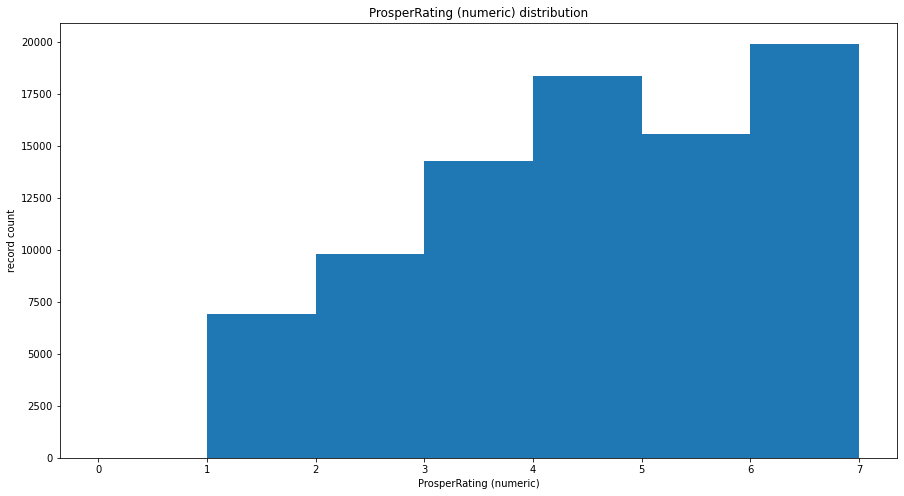

In [32]:
hist_plot("ProsperRating (numeric)",1,loan_data)

> ProsperRating has a left skewed  distribution, with a lot of loan listing on the high ProsperRating  end

#### DISTRIBUTION OF THE CATEGORICAL VARIABLE OF INTEREST AROUND LoanOriginalAmount AND COUNT OF RECORDS

> The categorical variable of interest are
    >> **LoanOriginalQuarter, Employment status, Occupation, ProsperRating (alpha), Income range, Borrower state**

## Quarter of the year with highest record count and average loanOriginalAmount

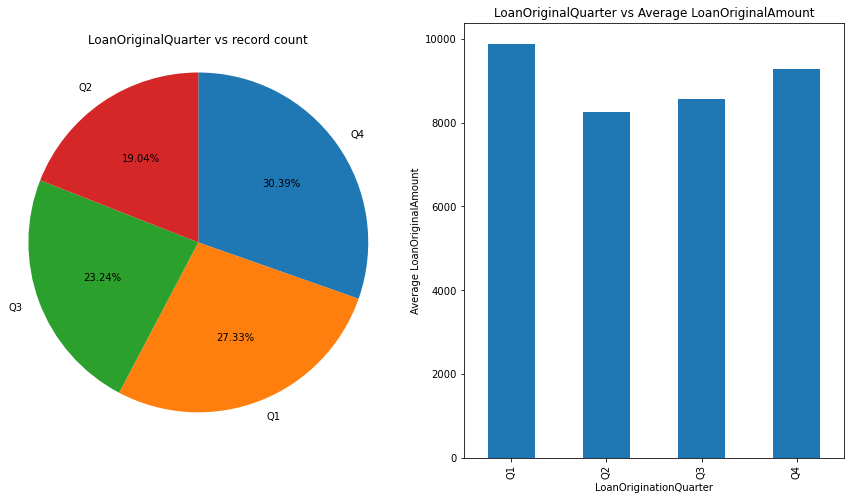

In [25]:
sorted_counts = loan_data.LoanOriginationQuarter.value_counts()
plt.figure(figsize=[15,8])


# for LoanOriginalQuarter vs record count
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title("LoanOriginalQuarter vs record count");

# for LoanOriginalQuarter vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("LoanOriginationQuarter")["LoanOriginalAmount"].mean().plot(kind="bar");
plt.ylabel("Average LoanOriginalAmount")
plt.title("LoanOriginalQuarter vs Average LoanOriginalAmount");

>Highest percentage of the loan listing was carried out in the 4th quarter, followed by the 1st quarter and lastly by the 2nd quarter of the year, with the 1st quarter recording the highest average loan amount for the years the survey was carried out

In [34]:
def univariate_bar(column,kind,size=None,sort=None):
    if size is None:
        plt.figure(figsize=[15,8])
    else:
        plt.figure(figsize=size)


    # for feature vs record count
    
    if sort == True:
        plt.subplot(1, 2, 1)
        loan_data.groupby(column)["LoanOriginalAmount"].count().sort_values(ascending=False).plot(kind=kind);
        plt.ylabel("record count")
        plt.title(f"{column}  vs record count");

        # for feature vs Average LoanOriginalAmount
        plt.subplot(1, 2, 2)
        loan_data.groupby(column)["LoanOriginalAmount"].mean().sort_values(ascending=False).plot(kind=kind,color="purple");
        plt.ylabel("Average LoanOriginalAmount")
        plt.title(f"{column}   vs Average LoanOriginalAmount");
    else:
        plt.subplot(1, 2, 1)
        loan_data.groupby(column)["LoanOriginalAmount"].count().plot(kind=kind);
        plt.ylabel("record count")
        plt.title(f"{column}  vs record count");

        # for feature vs Average LoanOriginalAmount
        plt.subplot(1, 2, 2)
        loan_data.groupby(column)["LoanOriginalAmount"].mean().plot(kind=kind,color="purple");
        plt.ylabel("Average LoanOriginalAmount")
        plt.title(f"{column}   vs Average LoanOriginalAmount");
        

## year with highest record count and average loanOriginalAmount

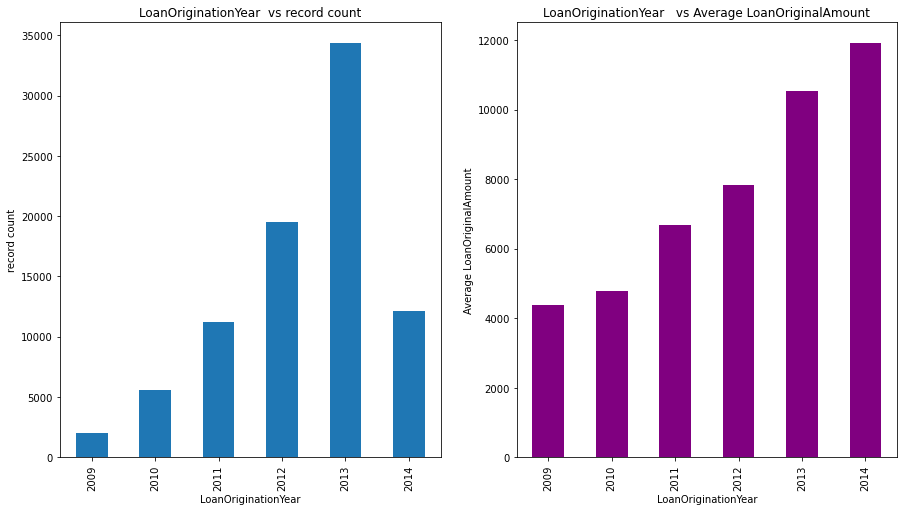

In [35]:
# for LoanOriginationYear
univariate_bar("LoanOriginationYear","bar")

> Based on yearly analysis from the chart we can see that 2013 recorded the highest loan listing with 2014 topping the chart for average loan amount requested for

## EmploymentStatus with highest record count and average loanOriginalAmount

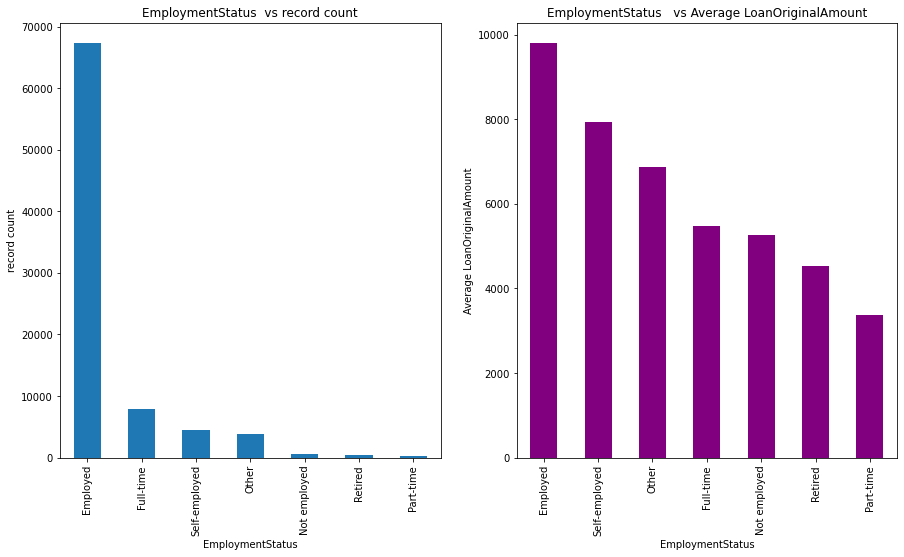

In [36]:
# for EmploymentStatus
univariate_bar("EmploymentStatus","bar",sort=True)

> retired, partime and not employed had relatively low number of loan listing compared to employed and full time workers

## Prosper rating with highest record count and average loanOriginalAmount

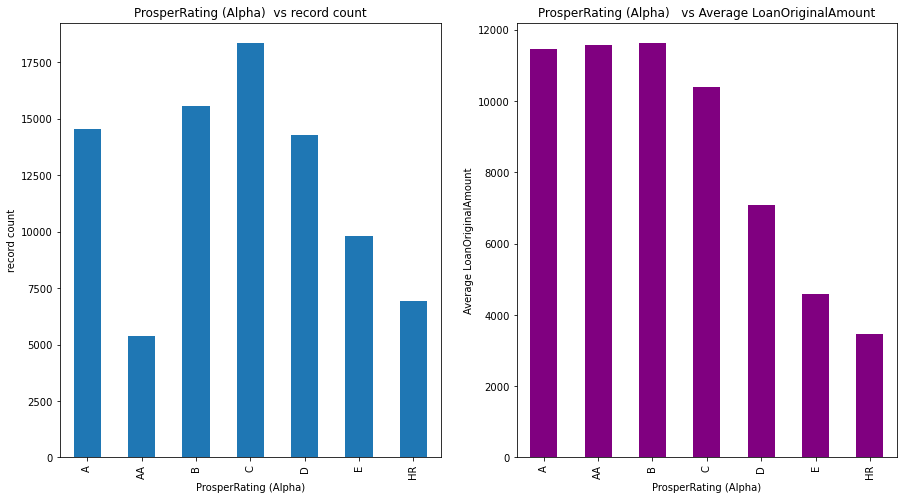

In [37]:
# for ProsperRating (Alpha)
univariate_bar("ProsperRating (Alpha)","bar")

> Members with prosperating C had the highest record of loan listing with relatively low number of members with prosperating AA from the survey, though AA topped the chart for average loan original amount this should be attached to thier high prosper rating

In [38]:
## Income rate with highest record count and average loanOriginalAmount

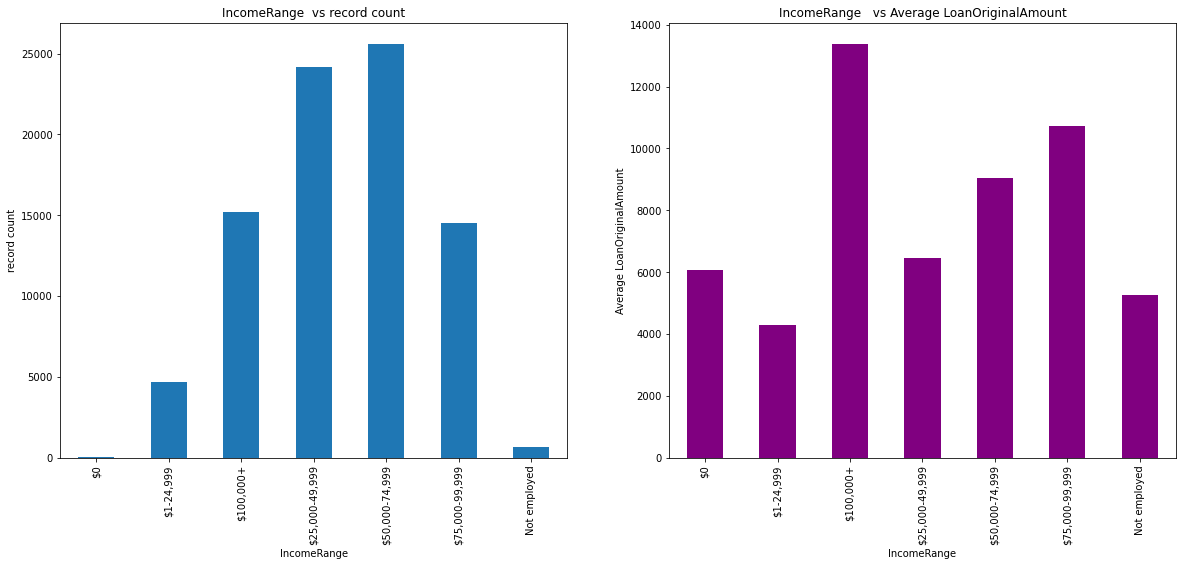

In [39]:
# for IncomeRange
univariate_bar("IncomeRange","bar",[20,8])

> from the chart High income earners constitute majority in the loan listing with $100,000+ topping the average loan original amount as expected

## BorrowerState with highest record count and average loanOriginalAmount

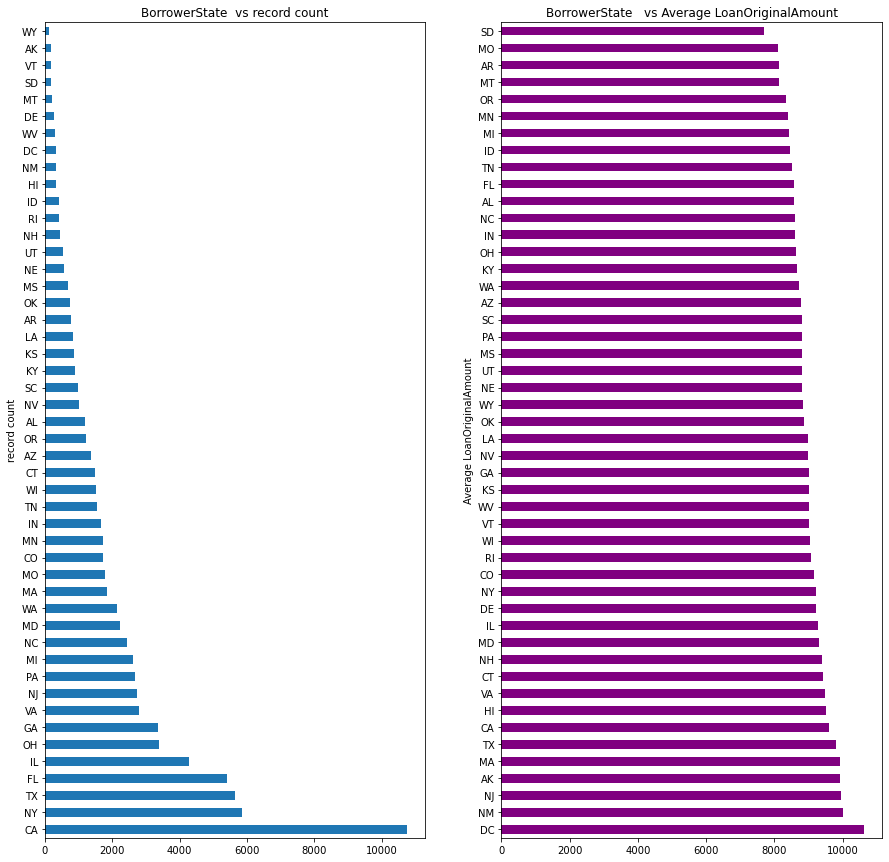

In [40]:
# for BorrowerState
univariate_bar("BorrowerState","barh",[15,15],sort=True)

> majority of the listing are coming from Carlifonia,New York,Texas, Florida with Washington, D.C topping the average loan amount recorded as expected

## ListingCategory with highest record count and average loanOriginalAmount

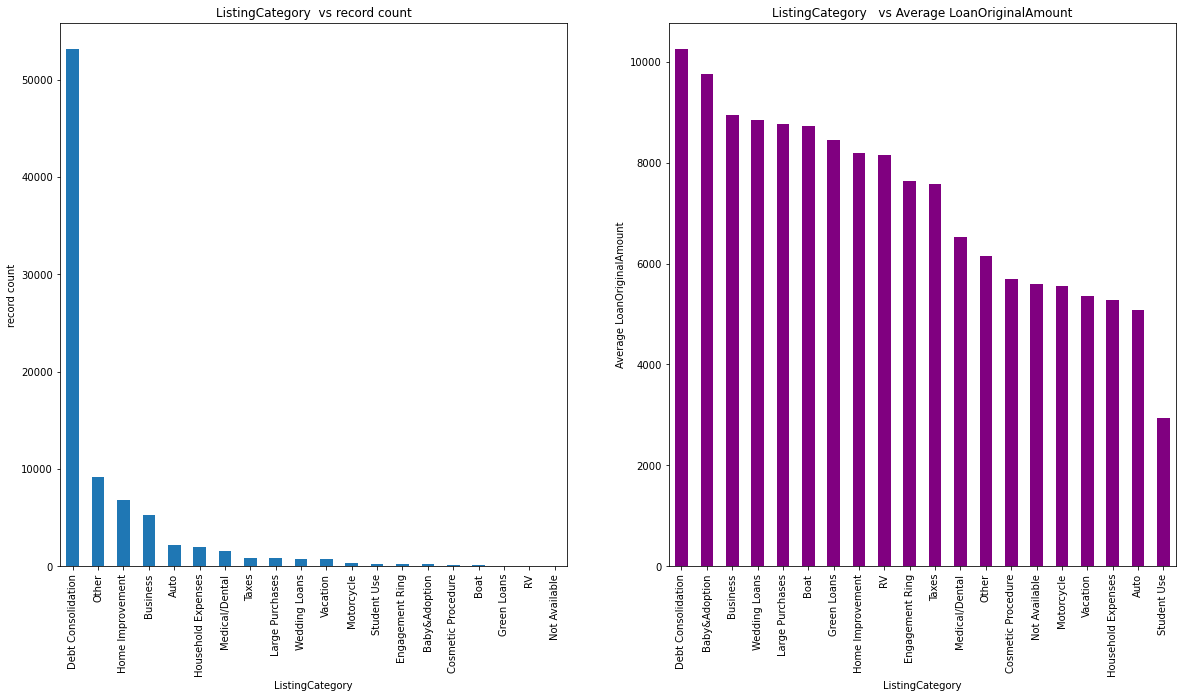

In [41]:
# for ListingCategory
univariate_bar("ListingCategory","bar",[20,10],sort=True)

> majority of the listing was for debt consolidation

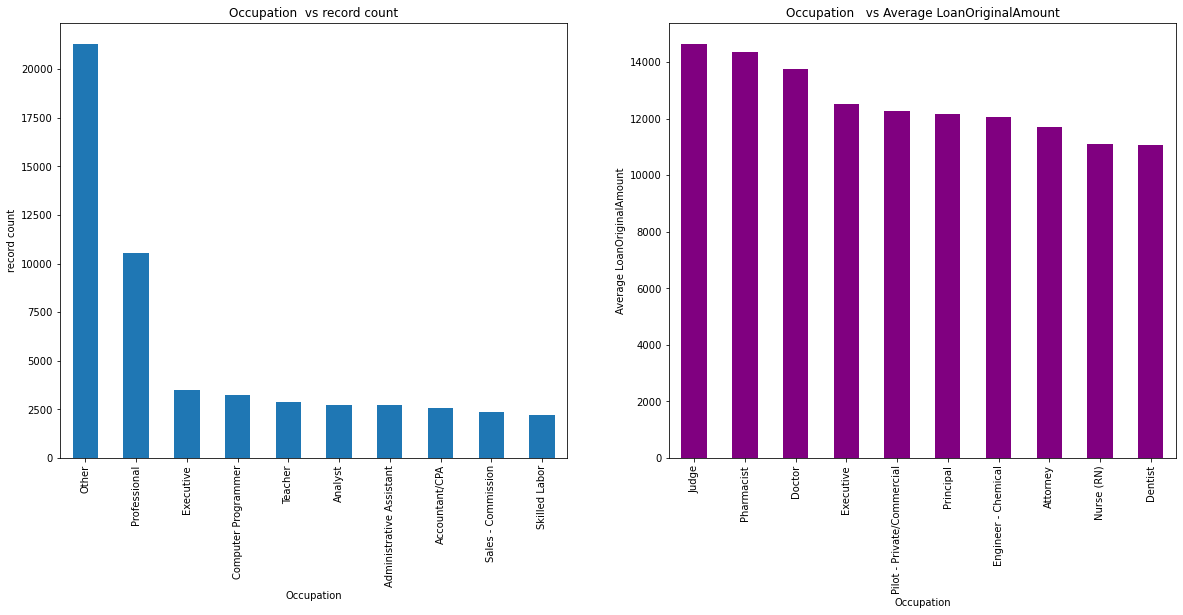

In [42]:
# for Occupation

plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
loan_data.groupby("Occupation")["LoanOriginalAmount"].count().sort_values(ascending=False).head(10).plot(kind="bar");
plt.ylabel("record count")
plt.title("Occupation  vs record count");

# for feature vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("Occupation")["LoanOriginalAmount"].mean().sort_values(ascending=False).head(10).plot(kind="bar",color="purple");
plt.ylabel("Average LoanOriginalAmount")
plt.title("Occupation   vs Average LoanOriginalAmount");

> Majority of the loan listing was associated with professionals with those in the medical fields topping the average loan original amount for this survey

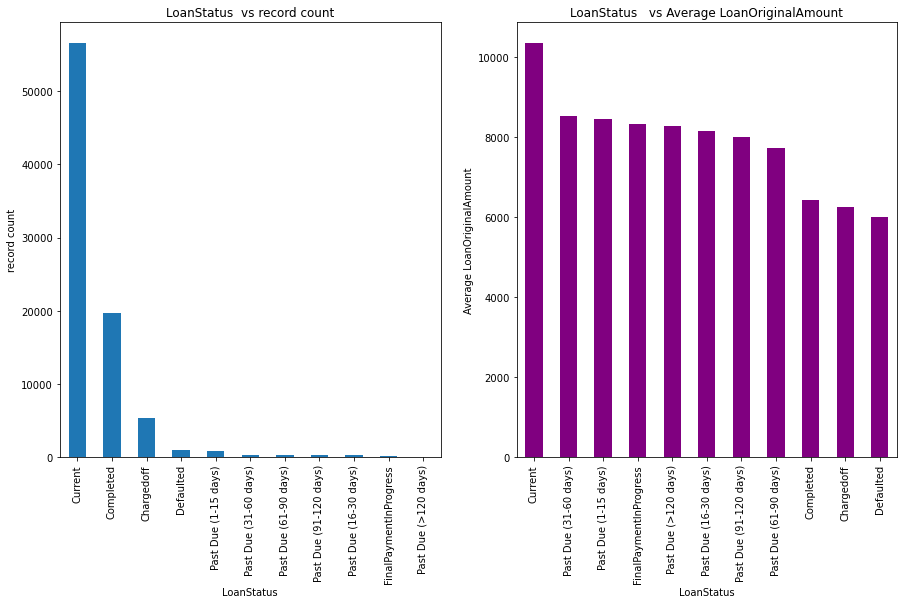

In [43]:
# for loanstatus
univariate_bar("LoanStatus","bar",[15,8],sort=True)

> from the loan status chart, current loan status form majority of the loan listing

## Question homeowner type highest record count and average loanOriginalAmount

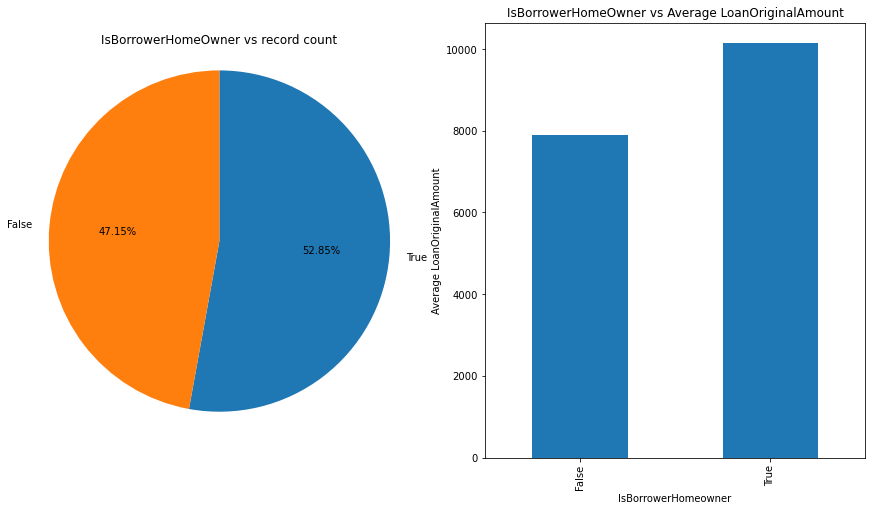

In [95]:
sorted_counts = loan_data.IsBorrowerHomeowner.value_counts()
plt.figure(figsize=[15,8])


# for IsBorrowerHomeOwner vs record count
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title("IsBorrowerHomeOwner vs record count");

# for IsBorrowerHomeOwner vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("IsBorrowerHomeowner")["LoanOriginalAmount"].mean().plot(kind="bar");
plt.ylabel("Average LoanOriginalAmount")
plt.title("IsBorrowerHomeOwner vs Average LoanOriginalAmount");

> 52 percent of the borrower were home owners and this set of people also topped the average loan original amount

# record count and average loan original amount through out the year

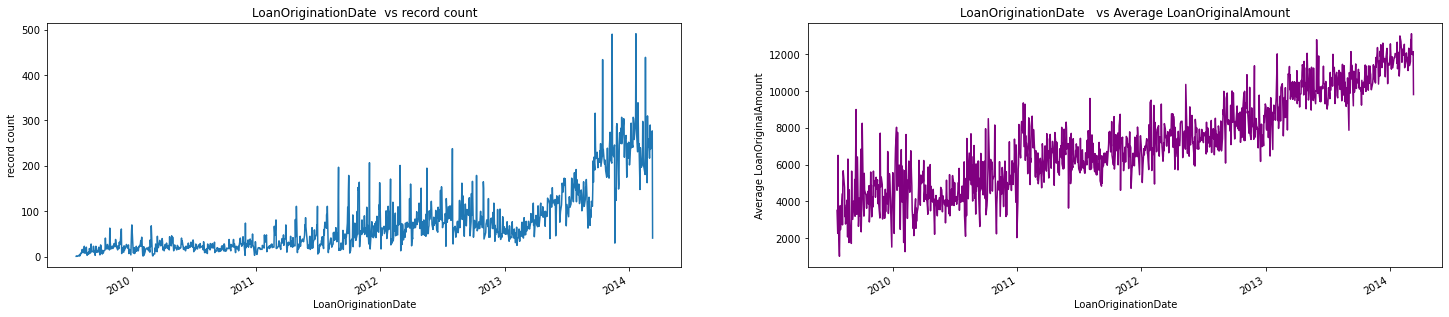

In [102]:
# for LoanOriginationDate
univariate_bar("LoanOriginationDate","line",[25,5])

> from the line graph we can see that the average loan original amount keeps increasing over the years of the survey

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> majority of the numerical features skewed to the right in thier distribution, no transformation was carried out at this point

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution was detected, sepeartion of the quarter from the year and also convertion of listingcategory to alpha was carried out

## Bivariate Exploration


In [48]:
numeric_vars = [
 'BorrowerAPR',
 'BorrowerRate',
 'ProsperRating (numeric)',
 'EmploymentStatusDuration',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'DebtToIncomeRatio',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'LP_InterestandFees',
 'Investors']

categoric_vars = ['LoanStatus',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'LoanOriginationQuarter',
 'LoanOriginationYear']

## How are the nemerical features related

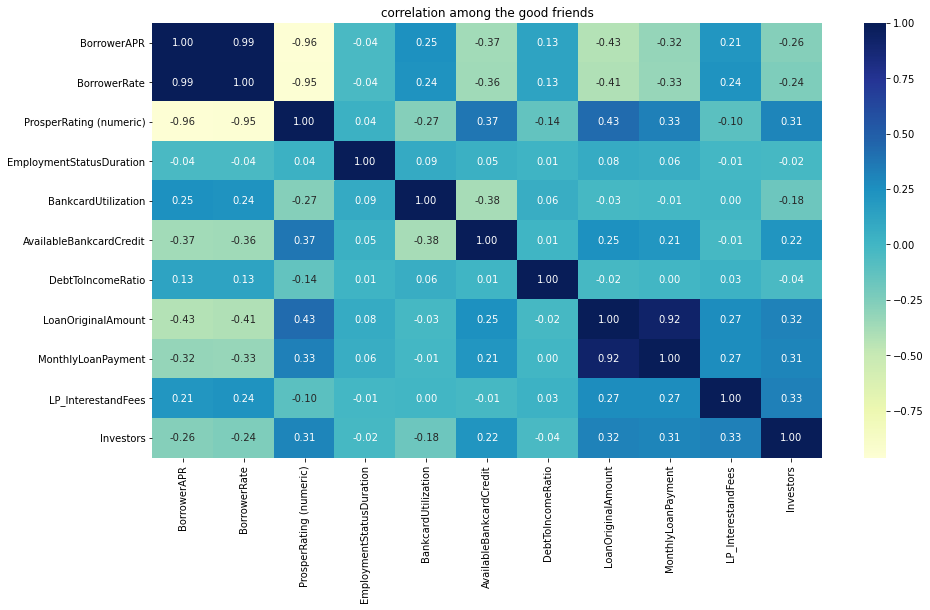

In [49]:
# correlation plot
plt.figure(figsize = [15,8])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap="YlGnBu", center = 0)
plt.title("correlation among the good friends") 
plt.show()

## from the colleration heat map we can detect certain relationship

>> borrower rate and borrower APR shows strong positive correlation

>> borrower rate and Prosper rating shows strong negative correlation

>> prosper rating and loan amount shows slighty strong positive correlation

# Relationship among numerical and two categorical features

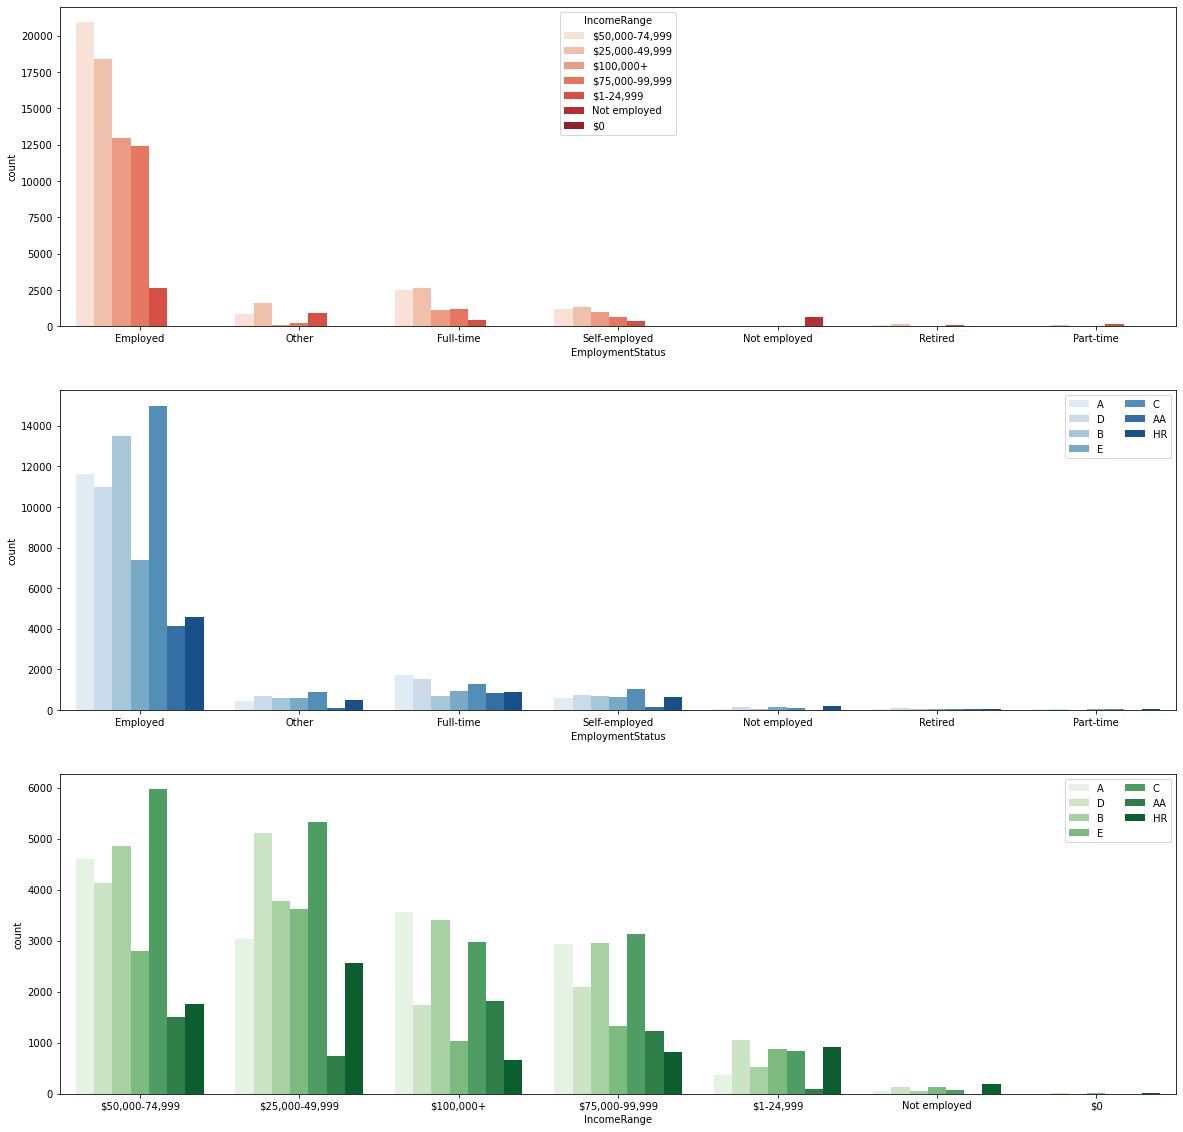

In [45]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 20])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The employed and middle class earners  dominate the survey with some strong correlation beign seen around some of the nemeric variable

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no

## Multivariate Exploration

C:\OLAMIDE\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


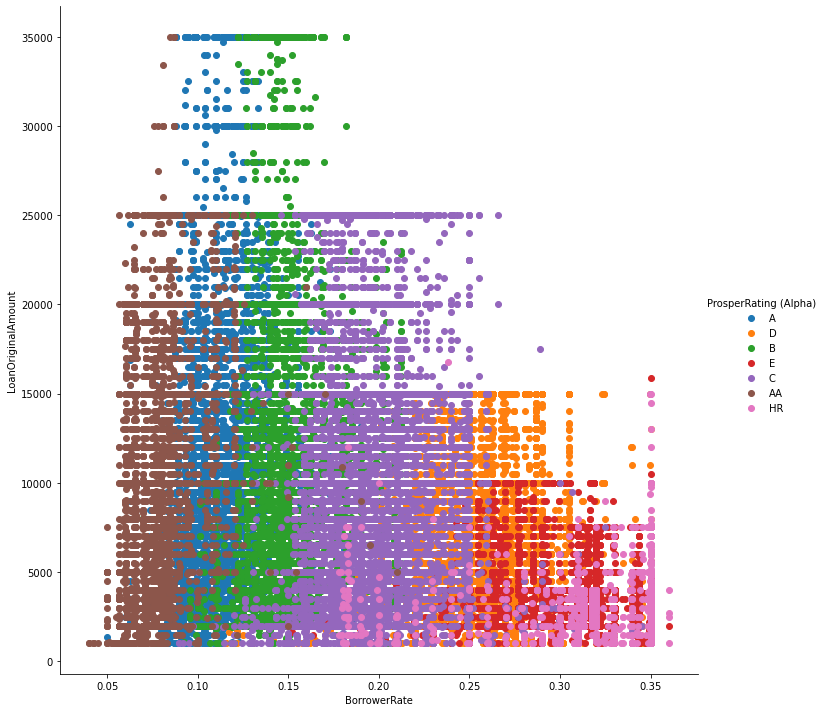

In [46]:
g = sb.FacetGrid(data =loan_data, hue = 'ProsperRating (Alpha)', size = 10)
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount')
g.add_legend();

> Prosper rating AA which is the best rating is closly associated with low borrower rate between 0.05 and 0.10 while 25000 above loan original amount is associated with AA, A,B

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The lower borrower rate is associated with higher prosper rating, while the top loan orignal amount was majorly associated with the top prosper rating and lower borrower rate

### Were there any interesting or surprising interactions between features?

> No

## Conclusions
> This project was centered around loan amount for each listing and their respective prosper rating using visualisation from the different python library for both exploratory and explanatory analysis
